<a href="https://colab.research.google.com/github/jafetimbre/mib-fiesta/blob/master/src/Copy_of_madalina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
housing_data = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/housing_data_cleaned.csv')
property_data=pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/property_data_cleaned.csv')


In [99]:
housing_data['m2_price'] = housing_data.apply(lambda row: round(row.price /row.m2_living), axis=1)
housing_data['decade'] = housing_data.apply(lambda row: (row.yr_built - row.yr_built%10)%100 if row.yr_built<2000 else round(row.yr_built,-1) , axis=1)

In [100]:
housing_data.head()

,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long,m2_price,decade
0,2014-10-13,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257,2036,50
1,2014-12-09,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319,2280,50
2,2014-12-09,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393,3356,60
3,2015-04-15,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337,1399,60
4,2014-05-27,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292,4374,40


In [101]:
housing_data[['m2_living','price','m2_lot','m2_price','yr_built','floors','bedrooms']].describe()

,m2_living,price,m2_lot,m2_price,yr_built,floors,bedrooms
count,7981.000000,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000
mean,165.649292,5.612638e+05,537.380028,3469.844631,1954.310112,1.492169,3.163889
std,73.781897,3.450309e+05,409.134820,1220.459527,33.313855,0.602185,1.054863
min,34.000000,8.200000e+04,48.000000,955.000000,1900.000000,1.000000,0.000000
25%,114.000000,3.620000e+05,335.000000,2575.000000,1926.000000,1.000000,3.000000
50%,151.000000,4.780000e+05,471.000000,3323.000000,1949.000000,1.000000,3.000000
75%,202.000000,6.500000e+05,664.000000,4174.000000,1979.000000,2.000000,4.000000
max,1109.000000,7.700000e+06,8435.000000,8838.000000,2015.000000,3.500000,33.000000


Aplicand metoda describe() pentru a  evalua functiile statistice de baza, remarcam: o medie a pretului de 5,6M suprafata locuibila de 165 m<sup>2</sup>, pretul pe m<sup>2</sup> de 3460 dolari, numarul de bai si dormitoare 3.

**<font color='DodgerBlue'>Ipoteza: </font>** Au fost mai multe case construite pe malul apei inainte de anii 2000. 
Pentru a observa acest lucru am construit un tabel pivot.

In [102]:
housing_data.pivot_table('date',index='decade', columns='waterfront', aggfunc='count')

waterfront,0,1
decade,,
0,588.0,1.0
10,690.0,2.0
20,1041.0,5.0
30,363.0,7.0
40,1319.0,5.0
50,1240.0,12.0
60,452.0,5.0
70,255.0,1.0
80,202.0,2.0


**<font color='Tomato'>Obs./Concluzie: </font>** In anii 50 au fost contruite cele mai multe case pe malul apei.

Initial, am reprezentat cu ajuorul unui scatterplot distributia pretului in functie de suprafata utila a locuintei si am remarcat cateva valori exceptionale (outliers) care ingreuneaza vizualizarea graficelor. Pentru o reprezentare mai concentrata am pastrat casele cu preturi mai mici sau egale cu 2M dolari, cu suprafata utila  pana in 450 metri patrati, 5 dormitoare si macar o baie. 

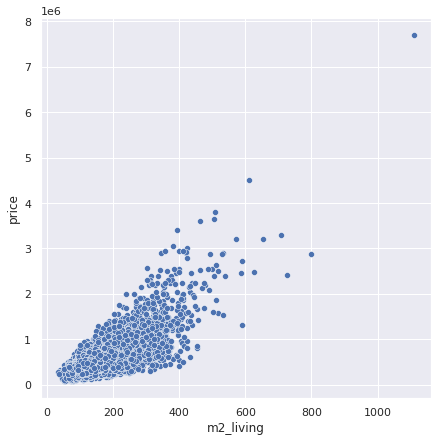

In [103]:
sns.scatterplot(x='m2_living', y='price',data=housing_data)

In [104]:
housing_data=housing_data[(housing_data.price<2000000) & (housing_data.bedrooms<=5)&(housing_data.m2_living<=450)&(housing_data.bathrooms>=1)]
len(housing_data)

7711

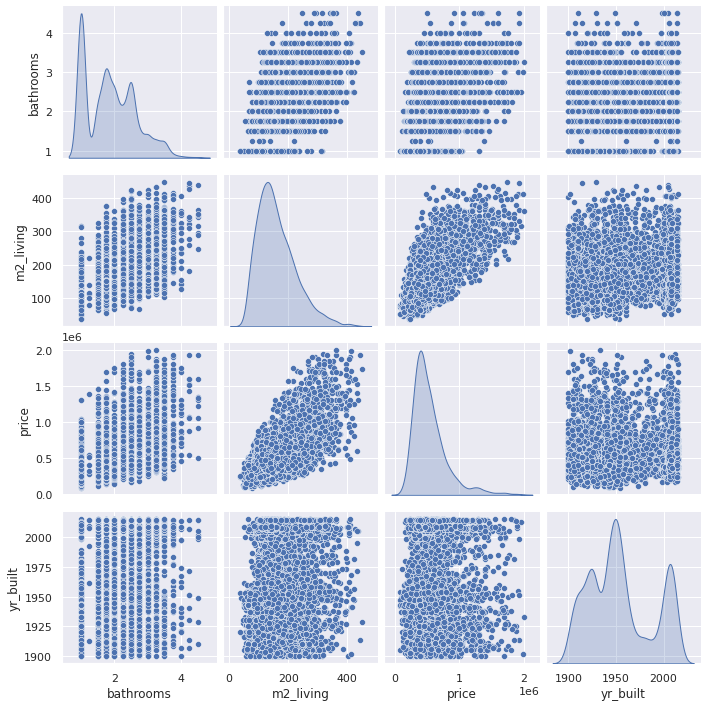

In [105]:
data=housing_data[['bathrooms','m2_living','price','yr_built']]
sns.set(rc={'figure.figsize':(20,20)})
sns.pairplot(data, diag_kind='kde',plot_kws={'alpha': 1})

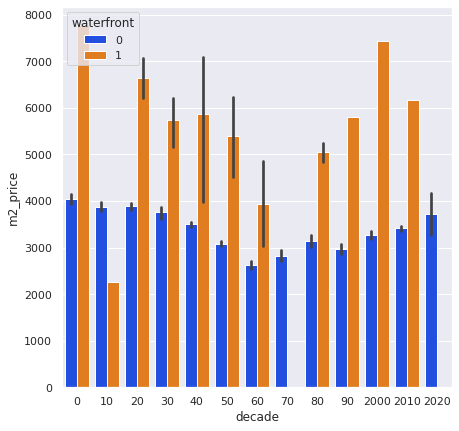

In [106]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(x='decade', y='m2_price',data=housing_data, hue = 'waterfront',palette="bright")

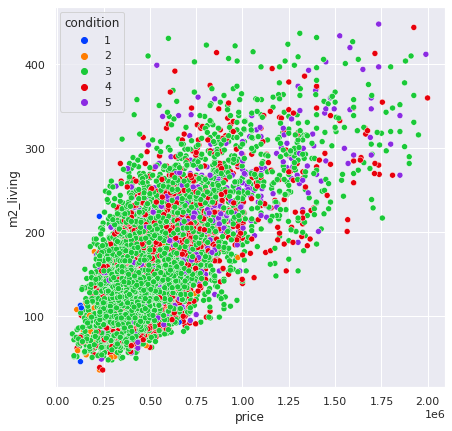

In [107]:
sns.scatterplot(data=housing_data, x="price", y="m2_living", hue="condition", palette="bright")

<font color='Tomato'>Observatie: </font> Distributia nu este simetrica

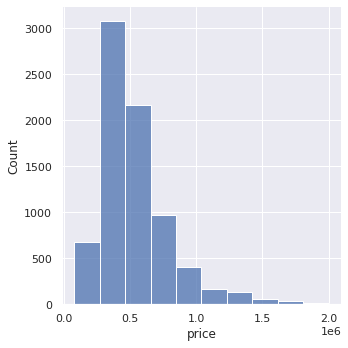

In [108]:
sns.displot(housing_data, x='price',bins=10)

<font color='Tomato'>Observatie: </font> Distributia nu este simetrica.Are un singur varf. Cele mai multe propietati au preturi intre 250.000 si 500.000 dolari .

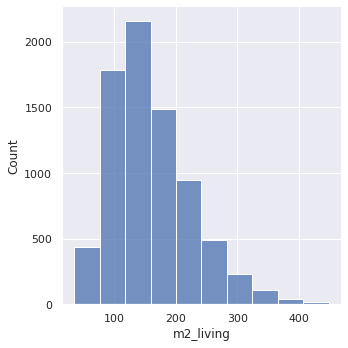

In [109]:
sns.displot(housing_data, x='m2_living',bins=10)

<font color='Tomato'>Observatie: </font> Distributia nu este simetrica.Cele mai multe case nu au o suprafata utila foarte mare.

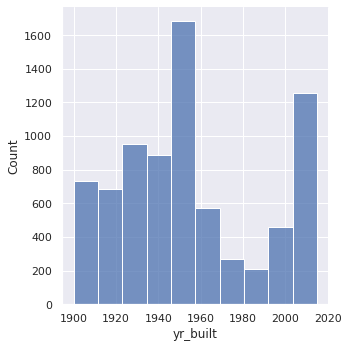

In [110]:
sns.displot(housing_data, x='yr_built',bins=10)

<font color='Tomato'>Observatie :</font>Exista mai multe varfuri.

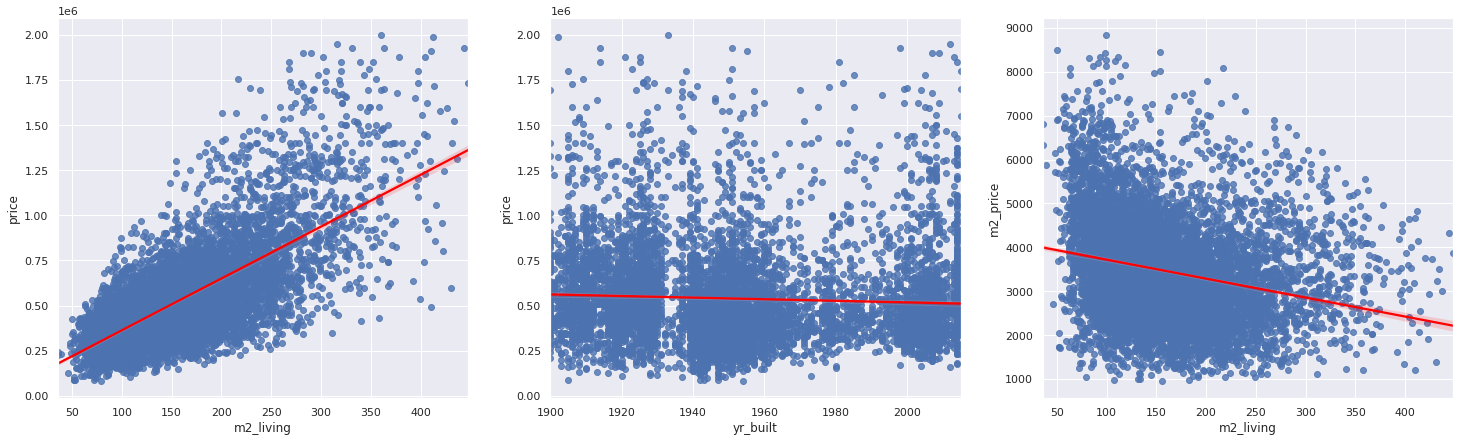

In [111]:
fig, axs = plt.subplots(ncols=3,nrows=1, figsize=(25,7))

sns.regplot(x='m2_living', y='price', data=housing_data,line_kws={"color": "red"},ax=axs[0])
sns.regplot(x='yr_built', y='price', data=housing_data,line_kws={"color": "red"},ax=axs[1])
sns.regplot(x='m2_living', y='m2_price', data=housing_data,line_kws={"color": "red"},ax=axs[2])


**<font color='Tomato'>Observatie: </font>** 
*   Intre pret si suprafata utila exista o corelatie directa.
*   Intre pret si anul construirii nu exista o corelatie.
*   Intre pretul pe m<sup>2</sup> si suprafata utilia exista o corelatie negativa.

In [112]:
housing_data.corr()['price'].sort_values()

long           -0.074525
zip            -0.058995
yr_built       -0.055109
decade          0.009503
m2_lot          0.087020
lat             0.145149
waterfront      0.160614
condition       0.163088
yr_renovated    0.169921
floors          0.239609
bedrooms        0.338052
m2_basement     0.364790
m2_price        0.466845
bathrooms       0.479319
grade           0.673568
m2_living       0.699487
price           1.000000
Name: price, dtype: float64